## **Table of Contents:**
* Introduction
* Import Libraries
* Getting the Data
* Data Exploration/Analysis
* Data Preprocessing or Cleaning
* Building Machine Learning Models
    - Training 7 different models
* Comparing different models
* Random Forest
* Summary

# **Introduction**

In this kernel I will go through the whole process of creating a sentiment classifier over the problems of each major U.S. 
airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and 
neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# **Import Libraries**

In [2]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup

# **Getting the Data**

In [3]:
tweet= pd.read_csv(r'C:/Users/hp/Desktop/Twitter Sentiment Analysis/Dataset/Tweets.csv')

# **Data Exploration/Analysis**

In [4]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
tweet.shape

(14640, 15)

In [6]:
tweet.info

<bound method DataFrame.info of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
5      570300767074181121          negative                        1.0000   
6      570300616901320704          positive                        0.6745   
7      570300248553349120           neutral                        0.6340   
8      570299953286942721          positive                        0.6559   
9      570295459631263746          positive                        1.0000   
10     570294189143031808           neutral                        0.6769   
11     570289724453216256          positive 

In [5]:
tweet.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [61]:
#counting the number of tweets each airlines has received 
tweet.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

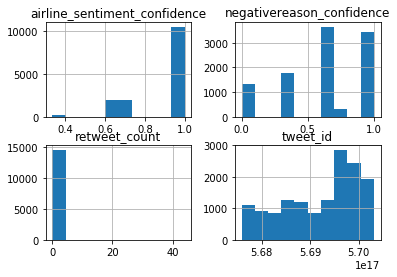

In [8]:
#Histograms

tweet.hist()
plt.show()

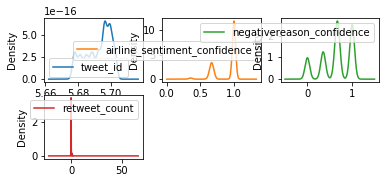

In [9]:
#Density Plots

tweet.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

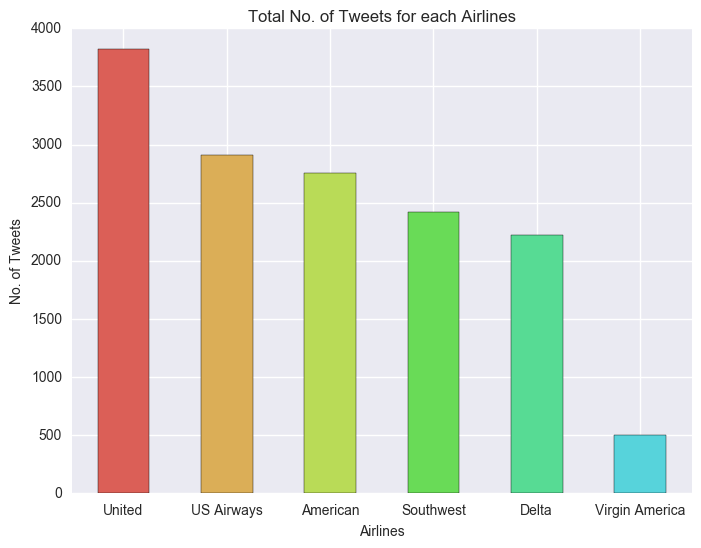

In [62]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("hls", 10) 
pd.Series(tweet["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [63]:
#counting the number of each type of sentiments 
tweet.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

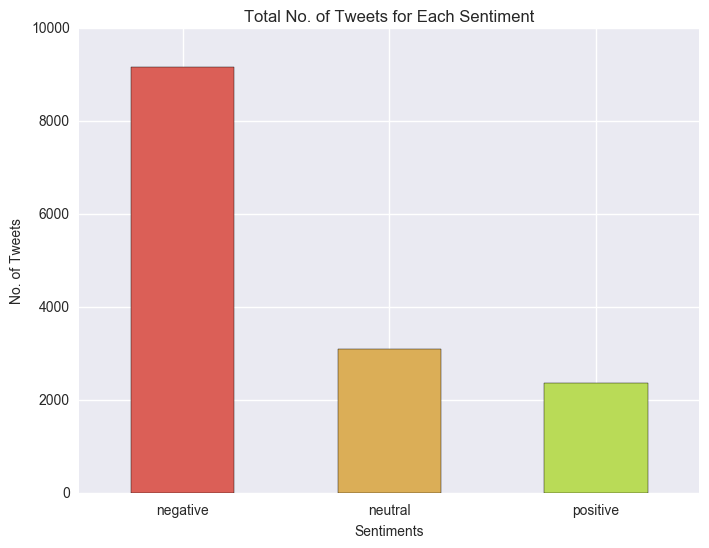

In [64]:
#Plotting the number of each type of sentiments 
colors=sns.color_palette("hls", 10)
pd.Series(tweet["airline_sentiment"]).value_counts().plot(kind = "bar",
                                    color=colors,figsize=(8,6),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

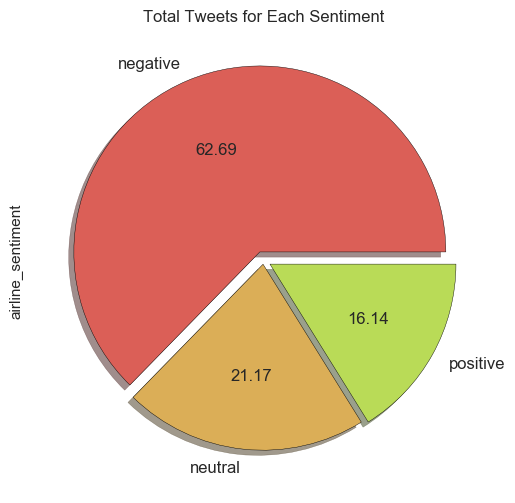

In [65]:
colors=sns.color_palette("hls", 10)
pd.Series(tweet["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

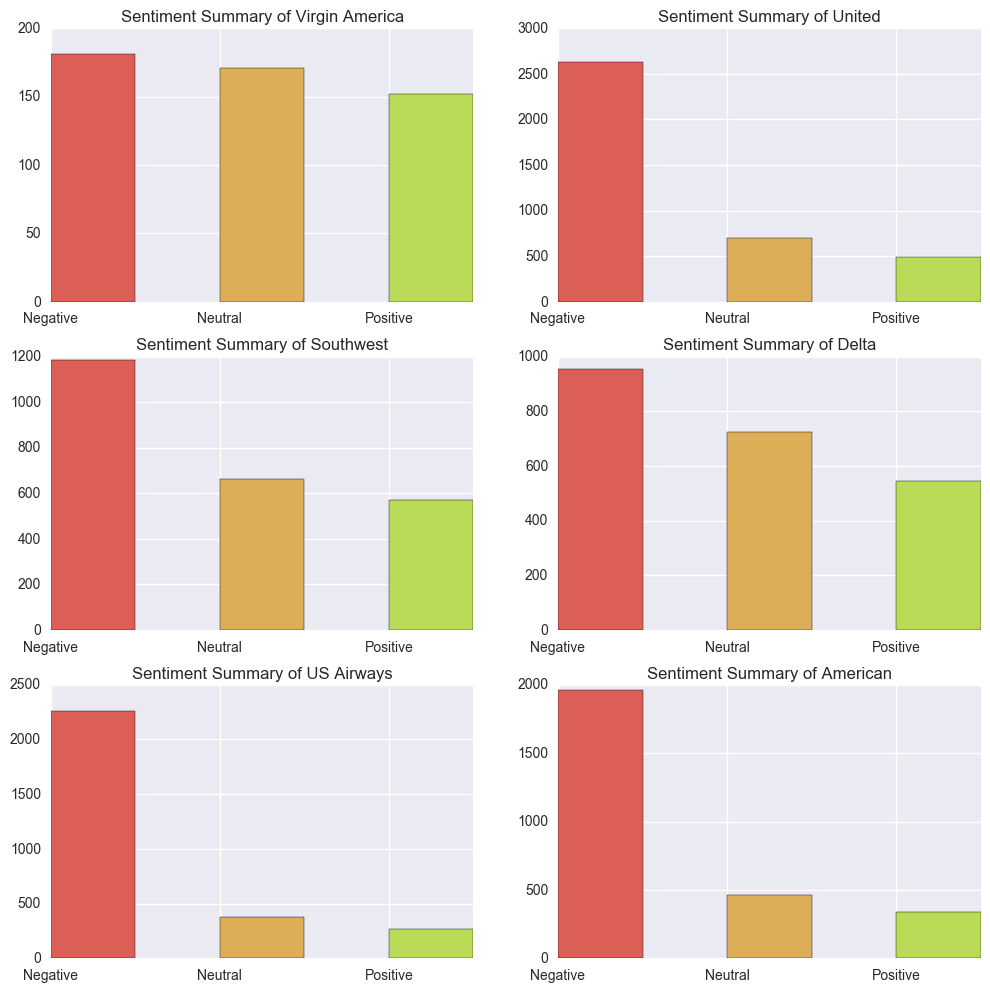

In [66]:
def plot_sub_sentiment(Airline):
    pdf = tweet[tweet['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("hls", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = tweet['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [67]:
#counting the total number of negative reasons
tweet.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

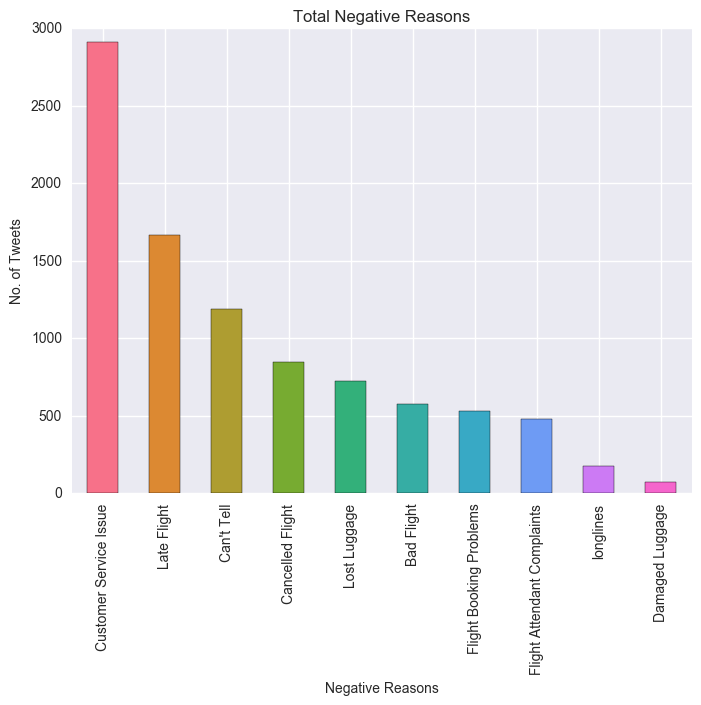

In [68]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(tweet["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [69]:
tweet.negativereason.value_counts().head(5)

Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64

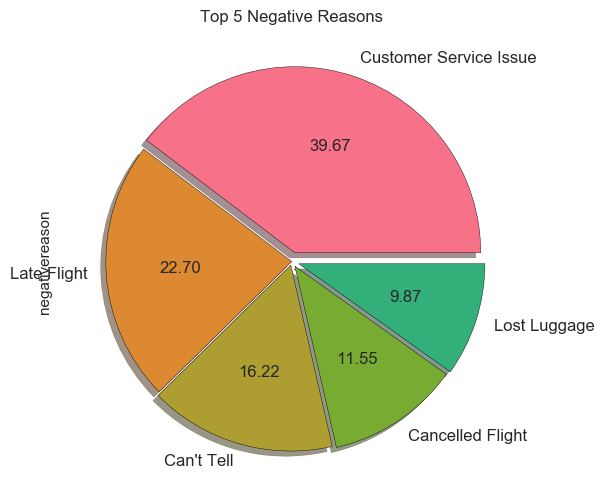

In [70]:
color=sns.color_palette("husl", 10)
pd.Series(tweet["negativereason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

In [71]:
air_senti=pd.crosstab(tweet.airline, tweet.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [72]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


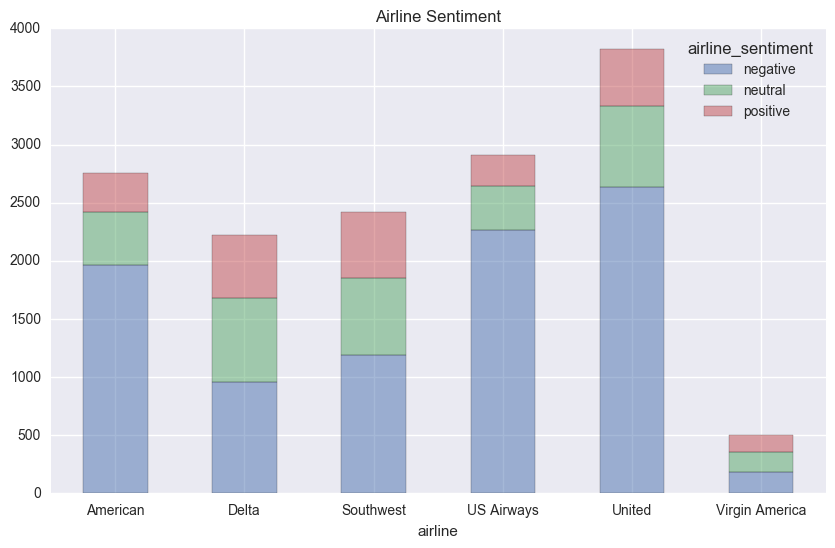

In [73]:
pd.crosstab(index = tweet["airline"],columns = tweet["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

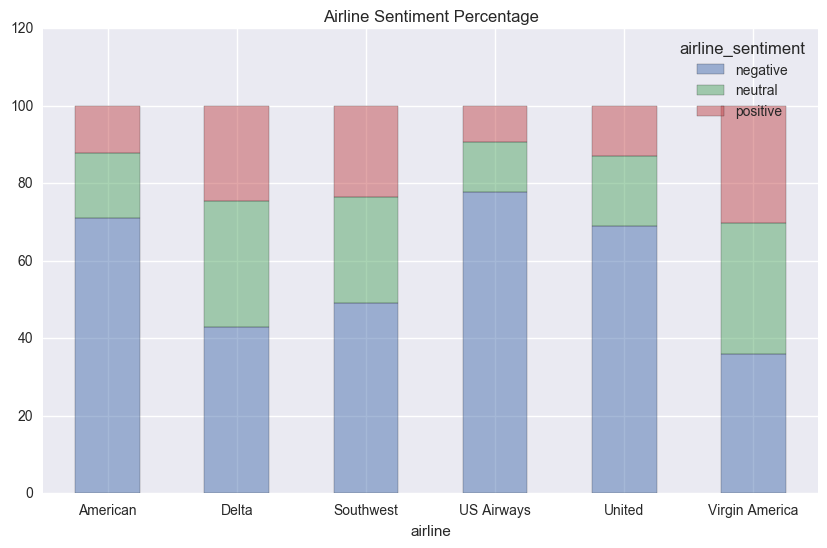

In [74]:

percent.plot(kind='bar',figsize=(10, 6),alpha=0.5,
                rot=0,stacked=True,title="Airline Sentiment Percentage")

In [75]:
df = tweet.groupby(['tweet_created_date','airline'])
df = df.airline_sentiment.value_counts()
df.unstack()

airline_sentiment                  negative  neutral  positive
tweet_created_date airline                                    
2/16/2015          Delta                1.0      1.0       NaN
                   United               2.0      NaN       NaN
2/17/2015          Delta              108.0     86.0      69.0
                   Southwest          213.0     85.0      86.0
                   US Airways         233.0     30.0      48.0
                   United             272.0     75.0      49.0
                   Virgin America      12.0     21.0      21.0
2/18/2015          American             1.0      NaN       NaN
                   Delta              105.0     86.0      77.0
                   Southwest          110.0    106.0      76.0
                   US Airways         244.0     32.0      41.0
                   United             257.0     90.0      59.0
                   Virgin America      19.0     21.0      20.0
2/19/2015          American             NaN      NaN       1.0
                   Delta              135.0     70.0      78.0
                   Southwest          127.0     94.0      96.0
                   US Airways         193.0     54.0      32.0
                   United             272.0     85.0      69.0
                   Virgin America      24.0     26.0      20.0
2/20/2015          American             1.0      NaN       NaN
                   Delta               91.0     90.0      70.0
                   Southwest          132.0    110.0      77.0
                   US Airways         248.0     52.0      33.0
                   United             342.0     99.0      85.0
                   Virgin America      21.0     32.0      17.0
2/21/2015          American             1.0      NaN       NaN
                   Delta               98.0     79.0      66.0
                   Southwest          257.0     60.0      53.0
                   US Airways         291.0     39.0      30.0
                   United             365.0     88.0      53.0
                   Virgin America      37.0     12.0      28.0
2/22/2015          American           762.0    132.0      94.0
                   Delta              255.0     76.0      77.0
                   Southwest          129.0     77.0      73.0
                   US Airways         561.0     60.0      27.0
                   United             532.0    102.0      69.0
                   Virgin America      27.0     16.0      10.0
2/23/2015          American           826.0    178.0     137.0
                   Delta              125.0    195.0      71.0
                   Southwest          116.0     83.0      77.0
                   US Airways         372.0     74.0      42.0
                   United             449.0    109.0      83.0
                   Virgin America      31.0     37.0      23.0
2/24/2015          American           369.0    153.0     104.0
                   Delta               37.0     40.0      36.0
                   Southwest          102.0     49.0      32.0
                   US Airways         121.0     40.0      16.0
                   United             142.0     49.0      25.0
                   Virgin America      10.0      6.0      13.0

# **Wordclouds**

In [ ]:
#to split date time into date 
#tweet['tweet_created'] = pd.to_datetime(tweet['tweet_created'])
#tweet["date_created"] = tweet["tweet_created"].dt.date

In [76]:
#visualization using wordcloud for the negative tweets
df=tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
                            

In [78]:
cleaned_word


'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [79]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

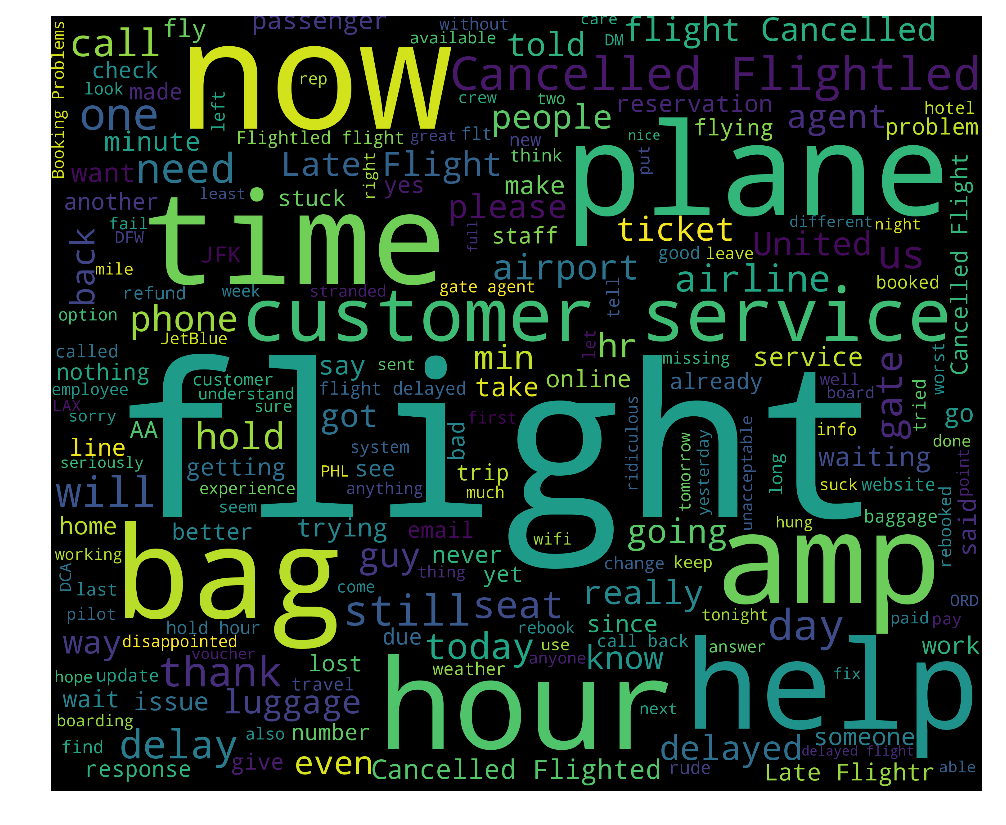

In [80]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [81]:
#visualization using wordcloud for the positive tweets
df=tweet[tweet['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [82]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

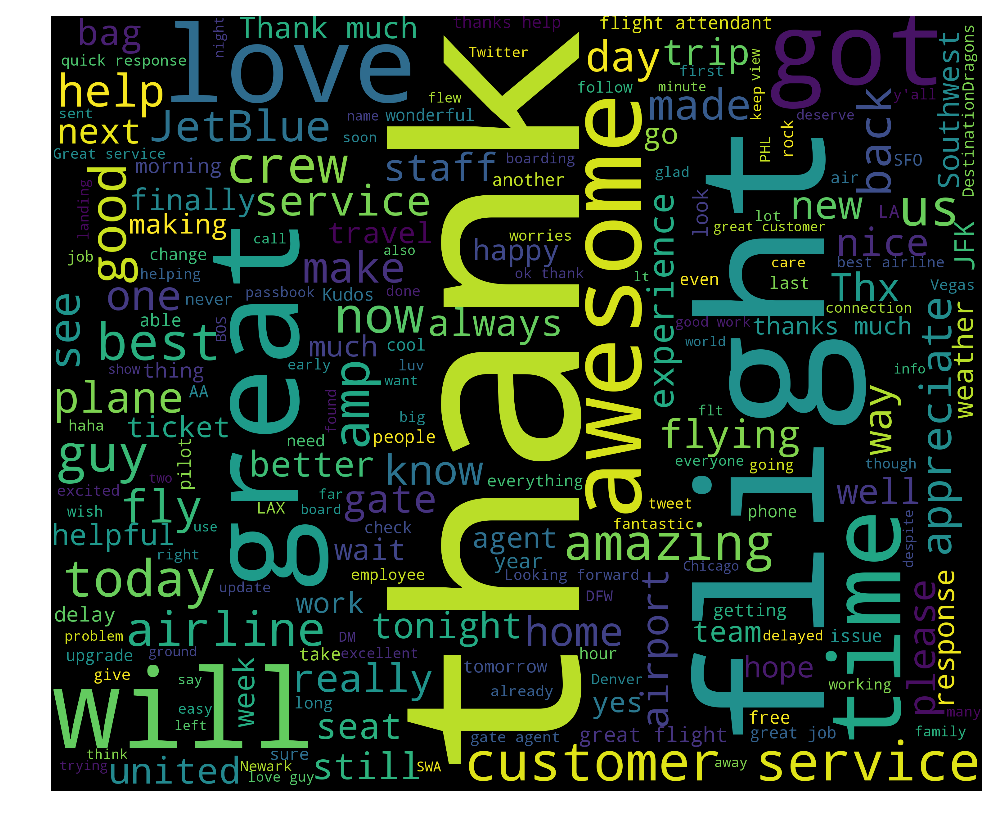

In [83]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [84]:
#visualization using wordcloud for the neutral tweets
df=tweet[tweet['airline_sentiment']=='neutral']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [85]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

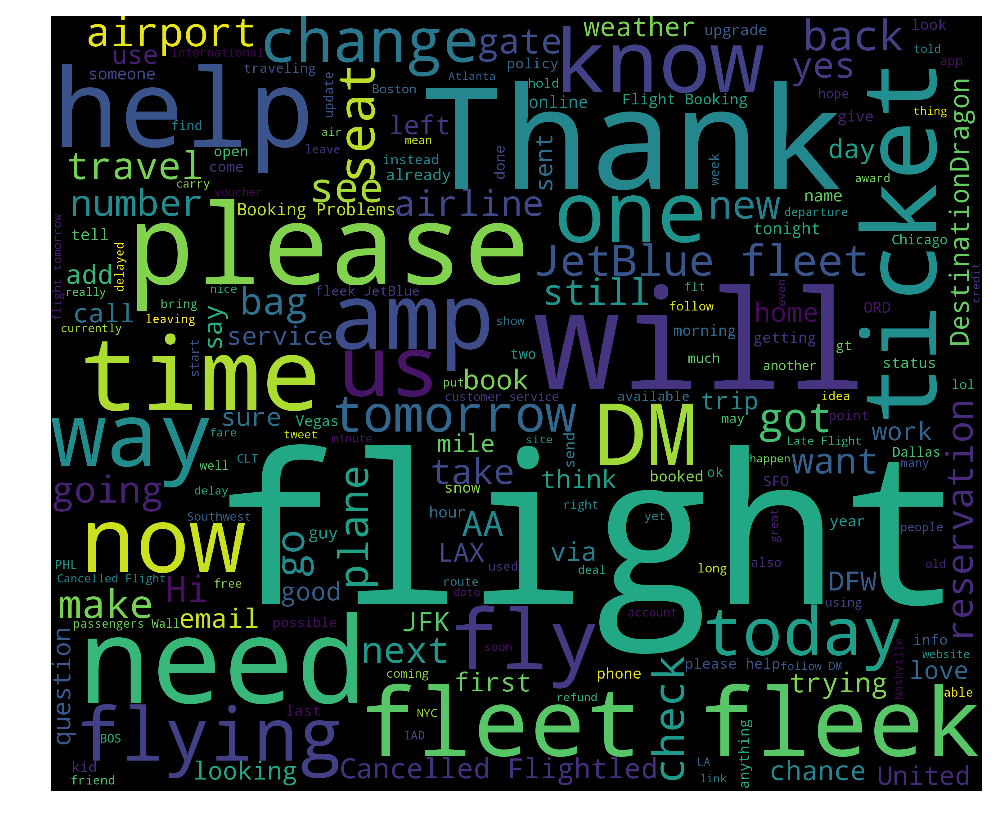

In [86]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [87]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [88]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [89]:
tweet['sentiment']=tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [91]:
tweet.sentiment.head()

0    1
1    1
2    1
3    0
4    0
Name: sentiment, dtype: int64

# **Data Preprocessing or Cleaning**

In [92]:
tweet['clean_tweet']=tweet['text'].apply(lambda x: tweet_to_words(x))
tweet['Tweet_length']=tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(tweet,test_size=0.2,random_state=42)

In [93]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
    train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
    test_clean_tweet.append(tweets)

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

# **Building Machine Learning Models**

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [96]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [98]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))    

Accuracy of LogisticRegression is 0.645150273224
Accuracy of KNeighborsClassifier is 0.589139344262
Accuracy of SVC is 0.645150273224
Accuracy of DecisionTreeClassifier is 0.753073770492
Accuracy of RandomForestClassifier is 0.8125
Accuracy of AdaBoostClassifier is 0.785519125683
Accuracy of GaussianNB is 0.572404371585


# **Comparing Different Models**

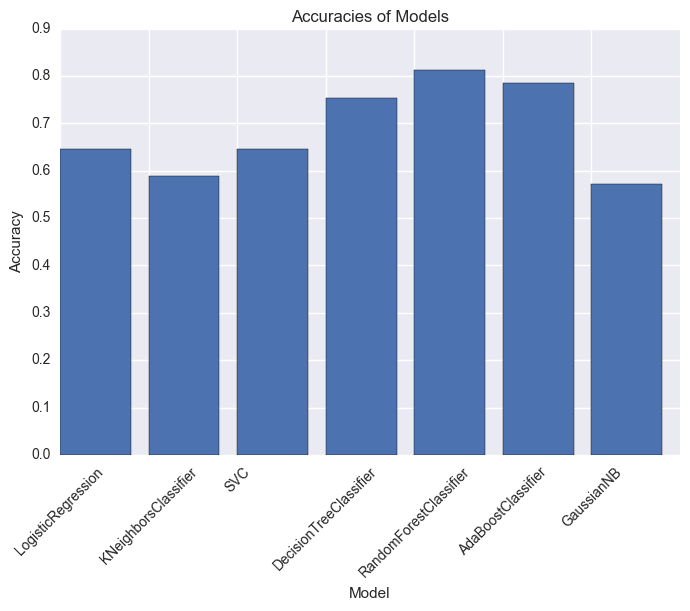

In [100]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

# **Random Forest**

## What is Random Forest ?

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems.  With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself. 

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

Below you can see how a random forest would look like with two trees:

# **Summary**